In [1]:
! pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.dropna(inplace=True, axis=0)

In [6]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [7]:
d1 = max(dates)
d2 = min(dates)
delta = d1 - d2
delta

datetime.timedelta(days=699)

In [8]:
days = []
for i in dates:
    delta = d2 - i
    days.append(delta)
df["Customer_for"] = days
df["Customer_for"] = pd.to_numeric(df["Dt_Customer"], errors='coerce')

In [9]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_for
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1346716800000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,1394236800000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,1377043200000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,1391990400000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1390089600000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1371081600000000000
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,1402358400000000000
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1390608000000000000
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1390521600000000000


In [10]:
df["Age"] = 2024 - df["Year_Birth"]

df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

df["Living_With"] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Single", "Alone": "Single", "YOLO": "Single", "Divorced": "Single", "Widow": "Single"})

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Family_Size"] = df["Living_With"].replace({"Single": 1, "Partner": 2}) + df["Children"]

df["Parenthood"] = np.where(df["Children"] > 0, 1, 0)

df["Education"] = df["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

df = df.rename(columns = {"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds":"Gold"})

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = df.drop(to_drop, axis=1)
df

C:\Users\Deevij Bansal\AppData\Local\Temp\ipykernel_18044\2216638891.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = df["Living_With"].replace({"Single": 1, "Partner": 2}) + df["Children"]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Parenthood
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,1346716800000000000,67,1617,Single,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,1394236800000000000,70,27,Single,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,1377043200000000000,59,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,1391990400000000000,40,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,1390089600000000000,43,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,3,11,0,1371081600000000000,57,1341,Partner,1,3,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,3,11,0,1402358400000000000,78,444,Partner,3,5,1
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,11,0,1390608000000000000,43,1241,Single,0,1,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,3,11,0,1390521600000000000,68,843,Partner,1,3,1


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import matplotlib
from matplotlib import colors

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

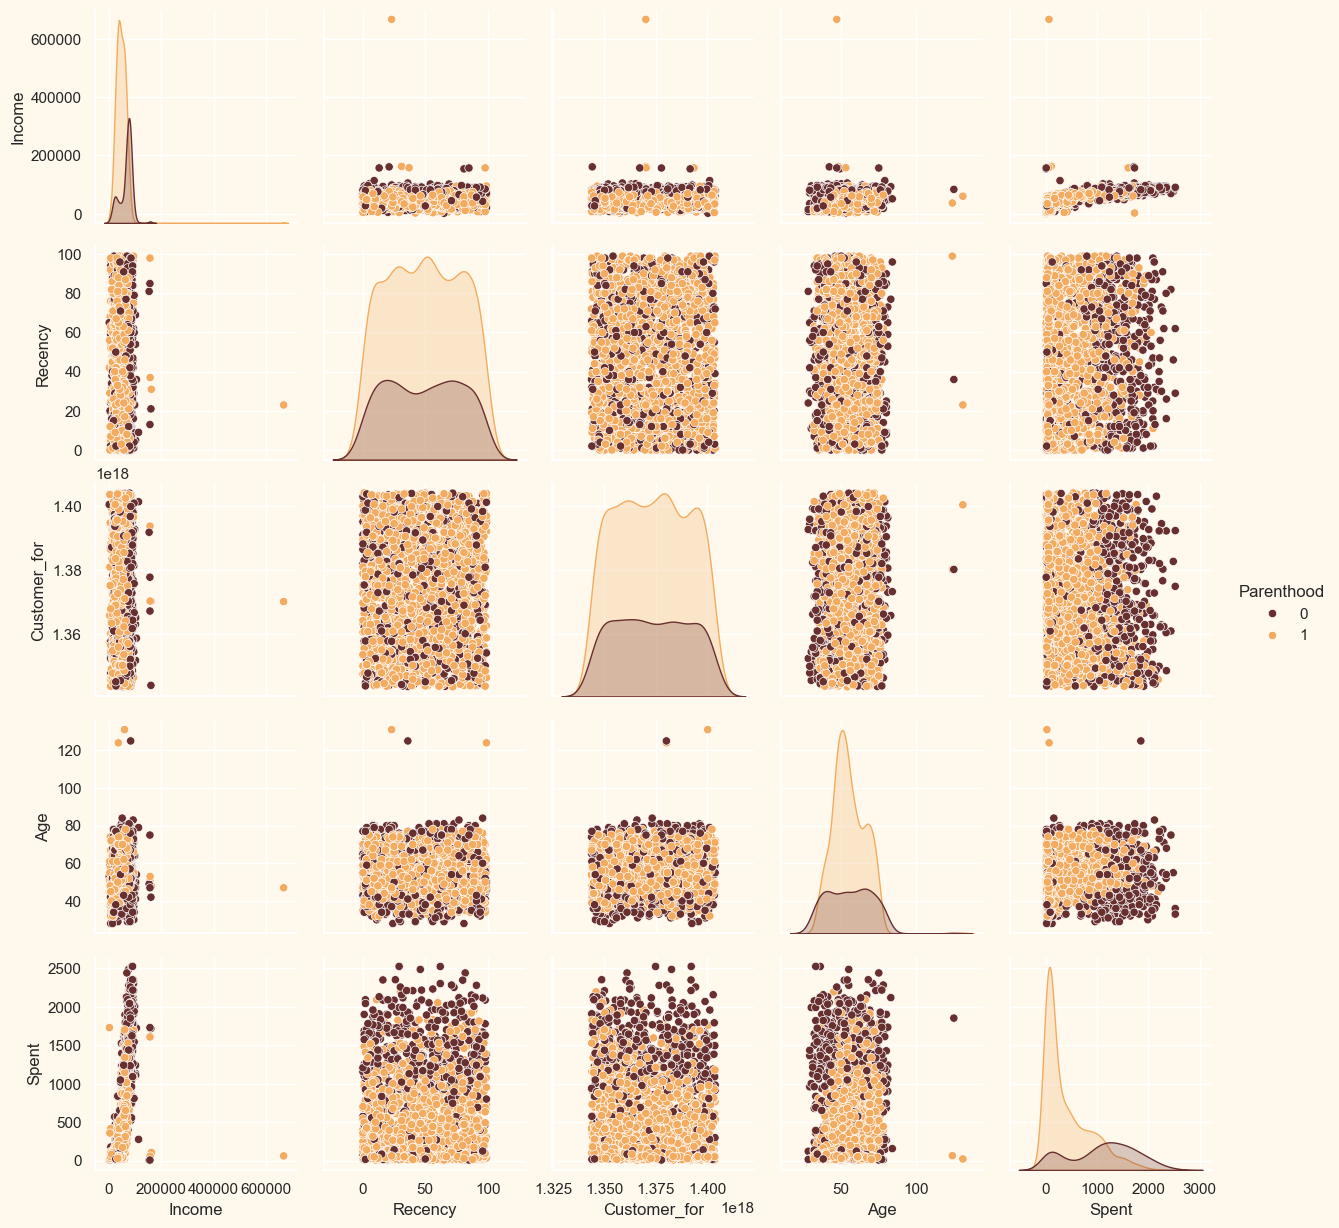

In [16]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_for", "Age", "Spent", "Parenthood"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Parenthood",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [17]:
#Dropping the outliers by setting a cap on Age and income.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


In [19]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Parenthood
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,1346716800000000000,67,1617,Single,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,1394236800000000000,70,27,Single,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,1377043200000000000,59,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,1391990400000000000,40,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,1390089600000000000,43,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,3,11,0,1371081600000000000,57,1341,Partner,1,3,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,3,11,0,1402358400000000000,78,444,Partner,3,5,1
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,11,0,1390608000000000000,43,1241,Single,0,1,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,3,11,0,1390521600000000000,68,843,Partner,1,3,1


In [20]:
df.drop(columns=["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Marital_Status"], inplace=True, axis=1)
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Living_With,Children,Family_Size,Parenthood
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,1346716800000000000,67,1617,Single,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,1394236800000000000,70,27,Single,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1377043200000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1391990400000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1390089600000000000,43,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,1371081600000000000,57,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1402358400000000000,78,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,1390608000000000000,43,1241,Single,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1390521600000000000,68,843,Partner,1,3,1


In [21]:
df_encoded = pd.get_dummies(df, columns=['Living_With', 'Education'])
df_encoded

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Age,Spent,Children,Family_Size,Parenthood,Living_With_Partner,Living_With_Single,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,0,0,58,635,88,546,172,88,88,...,67,1617,0,1,0,False,True,True,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,70,27,2,3,1,False,True,True,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,59,776,0,2,0,True,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,40,53,1,3,1,True,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,43,422,1,3,1,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,57,1341,1,3,1,True,False,True,False,False
2236,64014.0,2,1,56,406,0,30,0,0,8,...,78,444,3,5,1,True,False,False,True,False
2237,56981.0,0,0,91,908,48,217,32,12,24,...,43,1241,0,1,0,False,True,True,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,...,68,843,1,3,1,True,False,False,True,False


<Axes: >

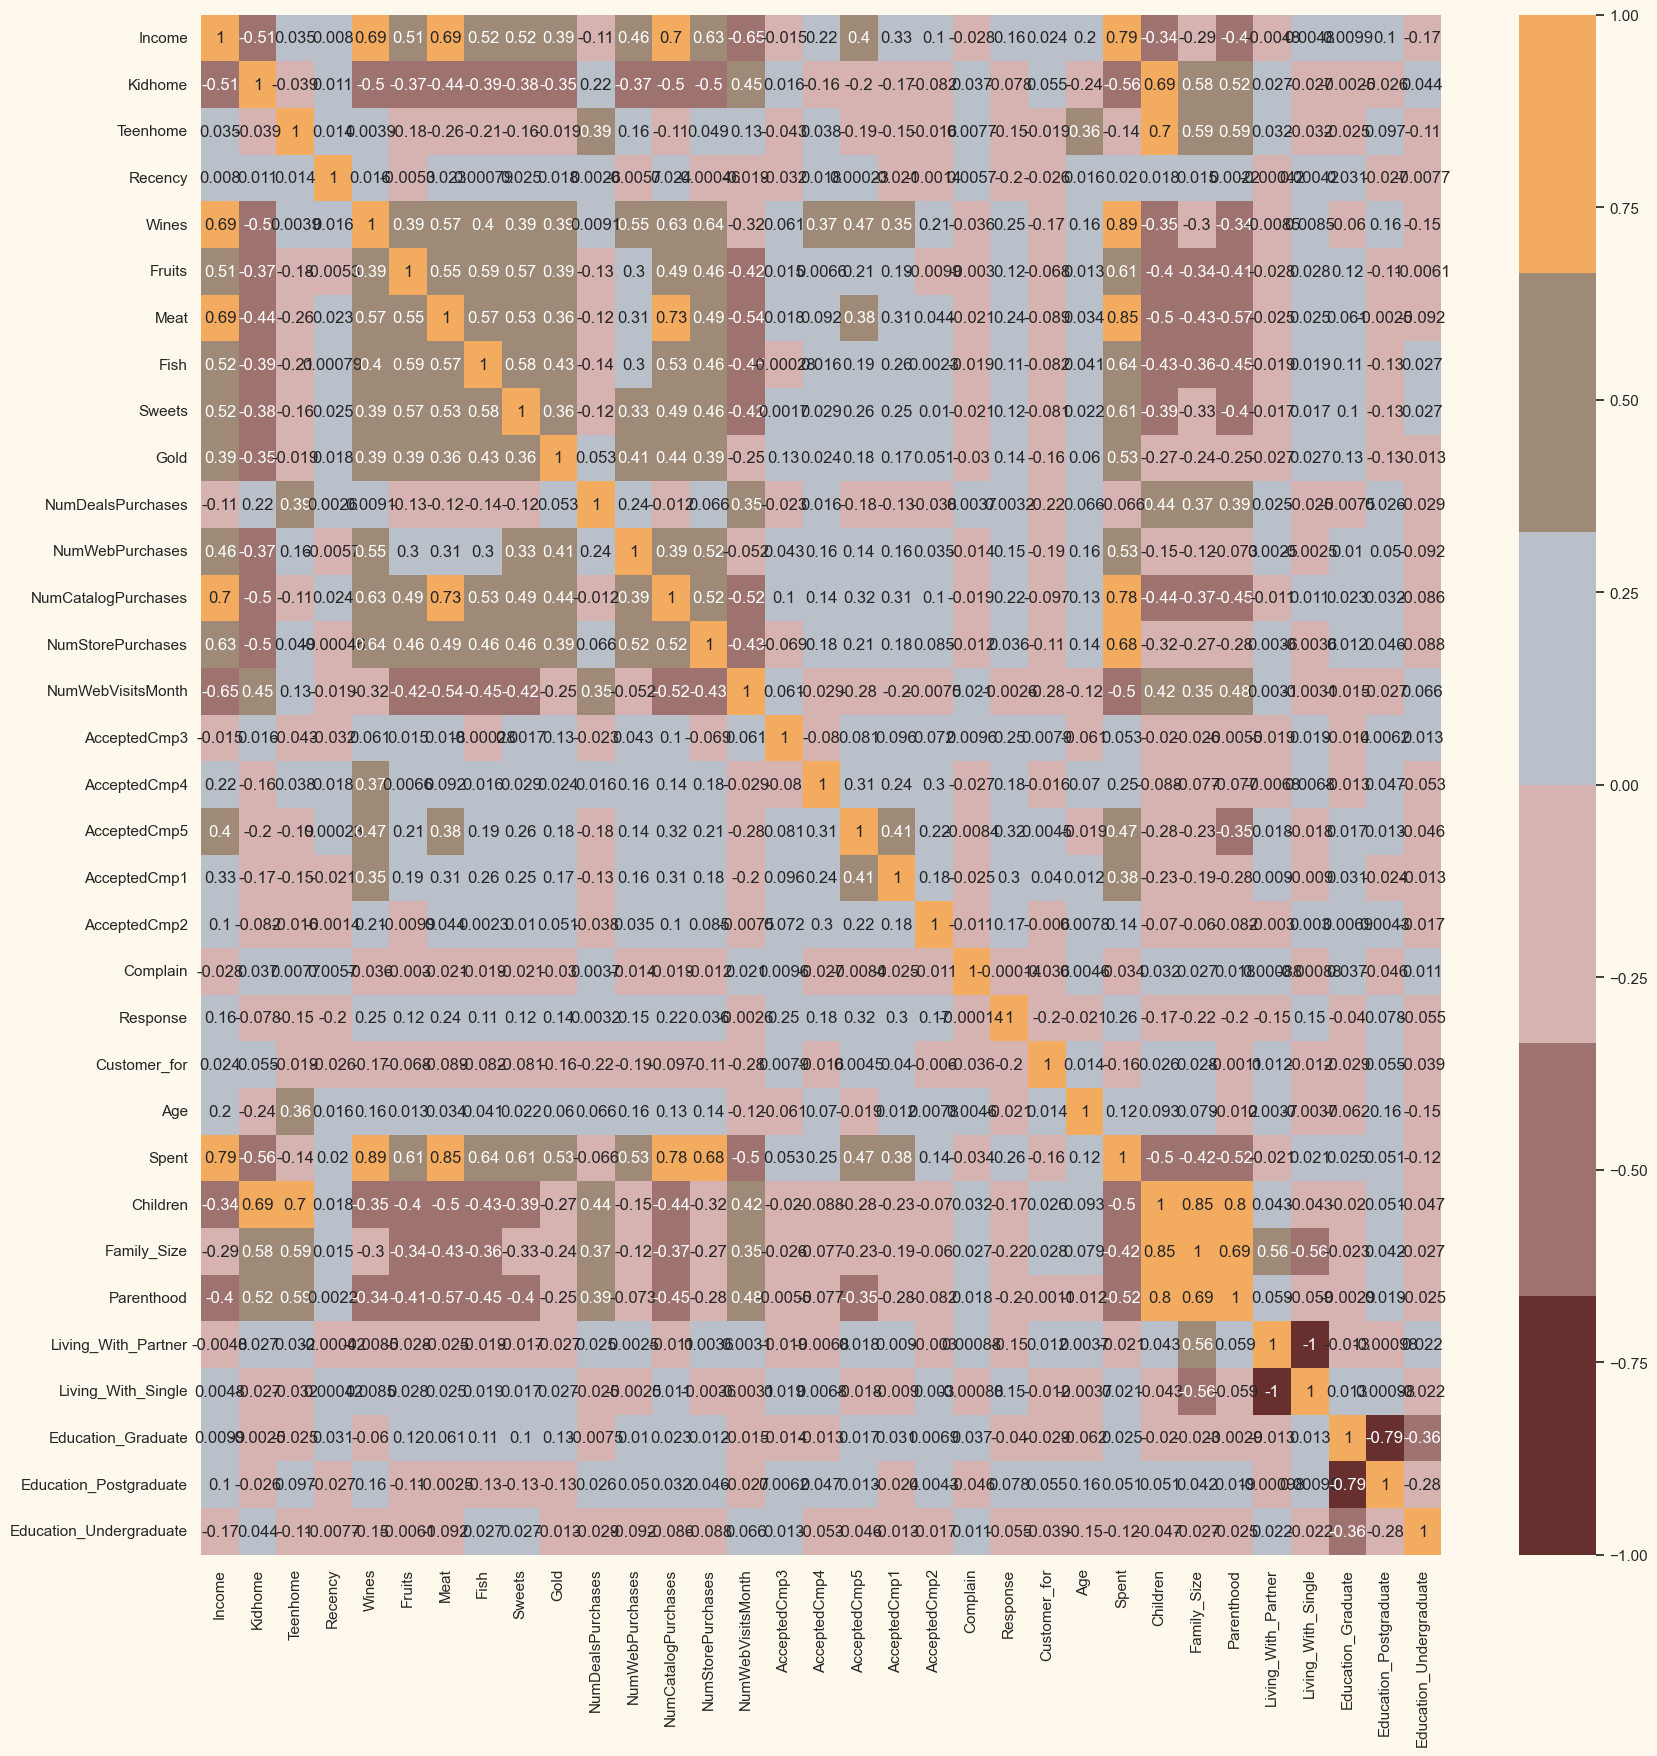

In [22]:
#correlation matrix
corrmat= df_encoded.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [24]:
from sklearn.preprocessing import StandardScaler

#Creating a copy of data
ds = df_encoded.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [25]:
scaled_ds

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Age,Spent,Children,Family_Size,Parenthood,Living_With_Partner,Living_With_Single,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,1.018352,1.676245,-1.264598,-1.758359,-1.581139,-1.349603,1.349603,0.991895,-0.786220,-0.358569
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,1.274785,-0.963297,1.404572,0.449070,0.632456,-1.349603,1.349603,0.991895,-0.786220,-0.358569
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,0.334530,0.280110,-1.264598,-0.654644,-1.581139,0.740959,-0.740959,0.991895,-0.786220,-0.358569
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-1.289547,-0.920135,0.069987,0.449070,0.632456,0.740959,-0.740959,0.991895,-0.786220,-0.358569
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-1.033114,-0.307562,0.069987,0.449070,0.632456,0.740959,-0.740959,-1.008171,1.271909,-0.358569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,...,0.163575,1.218061,0.069987,0.449070,0.632456,0.740959,-0.740959,0.991895,-0.786220,-0.358569
2208,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,...,1.958607,-0.271040,2.739158,2.656499,0.632456,0.740959,-0.740959,-1.008171,1.271909,-0.358569
2209,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,...,-1.033114,1.052052,-1.264598,-1.758359,-1.581139,-1.349603,1.349603,0.991895,-0.786220,-0.358569
2210,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,...,1.103830,0.391336,0.069987,0.449070,0.632456,0.740959,-0.740959,-1.008171,1.271909,-0.358569


In [26]:
#Initiating PCA to reduce dimentions aka features to 3
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.092154e-16,2.880462,-6.002430,-2.537146,-0.793779,2.423205,7.414325
col2,2212.0,-4.497106e-17,1.749420,-4.721865,-1.210502,-0.103736,1.238934,6.277170
col3,2212.0,-4.657717e-17,1.470668,-2.660214,-1.232694,-0.393553,1.273933,3.965583


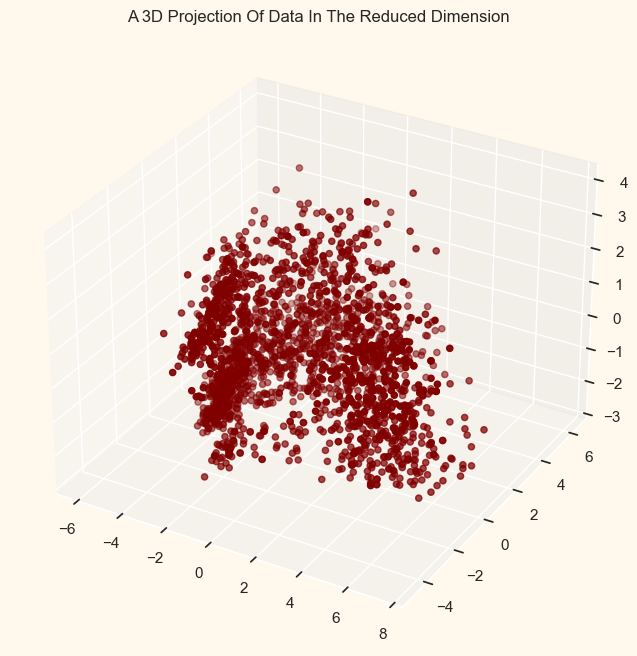

In [27]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [28]:
! pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/282.6 kB 363.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 326.8 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/282.6 kB 451.8 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 532.5 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 532.5 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 532.5 kB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Elbow Method to determine the number of clusters to be formed:


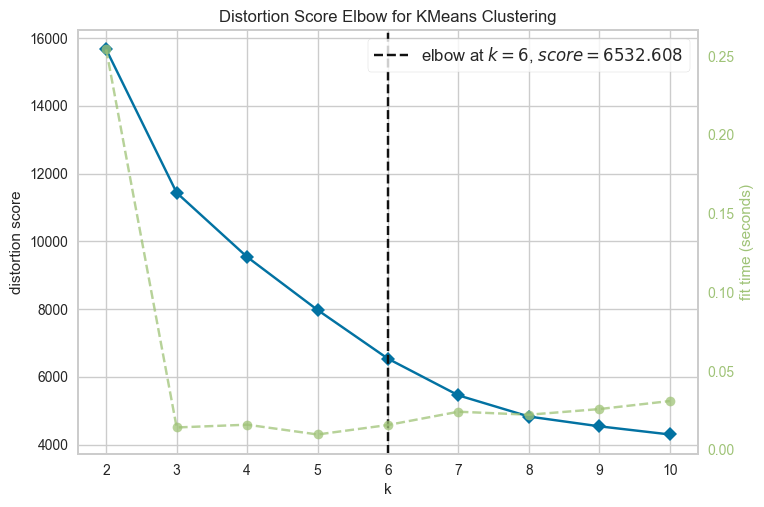

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

PCA_ds.reset_index(drop=True, inplace=True)
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

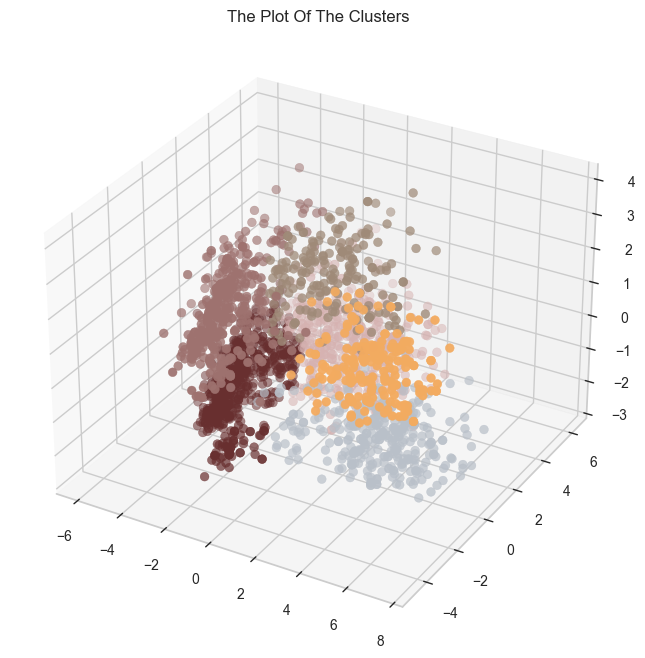

In [35]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

C:\Users\Deevij Bansal\AppData\Local\Temp\ipykernel_18044\2134242489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Clusters"], palette= pal)


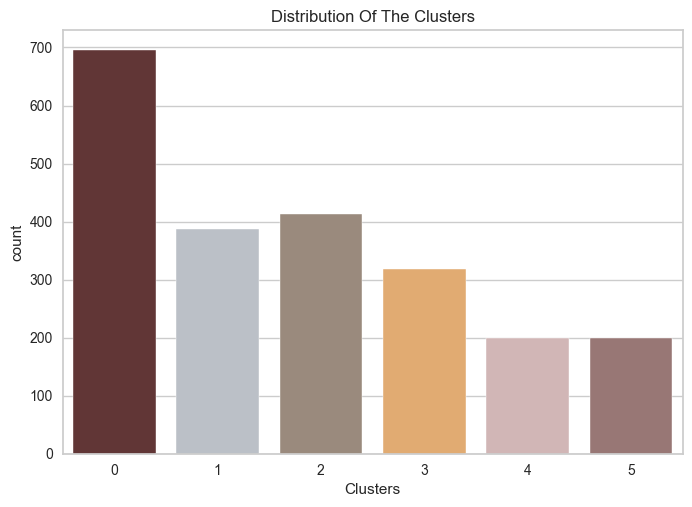

In [37]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#D6B2B1", "#9E726F"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

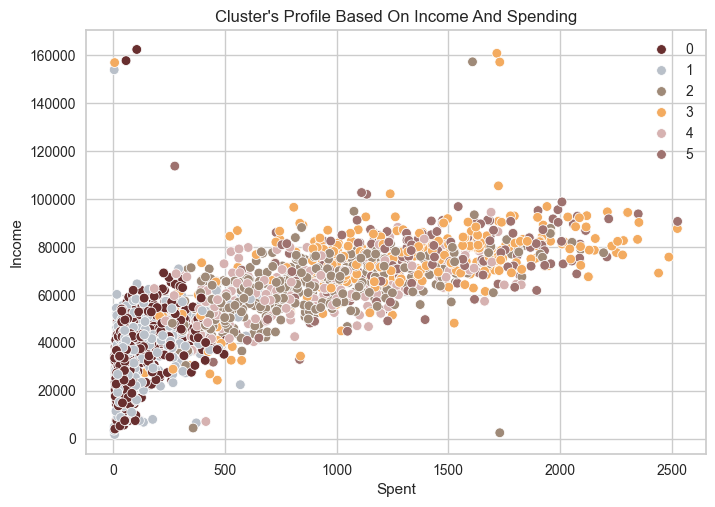

In [38]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

C:\Users\Deevij Bansal\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Deevij Bansal\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Deevij Bansal\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Deevij Bansal\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarnin

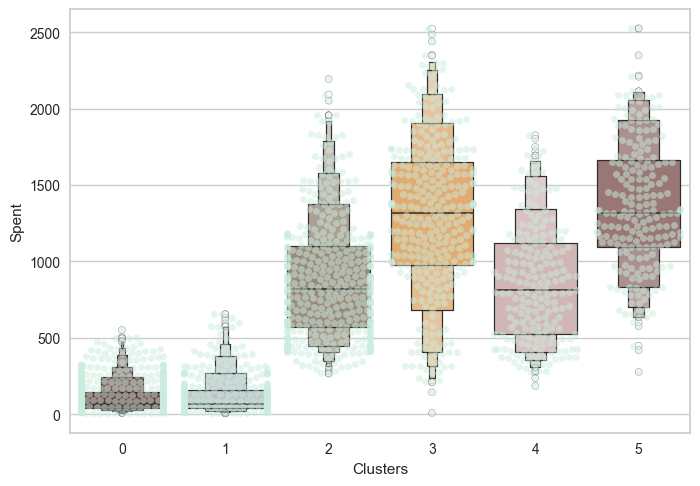

In [39]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()